<a href="https://colab.research.google.com/github/peperjet/tutorial/blob/main/today_260128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 연습용 데이터 만들기

import pandas as pd

# 가게별, 제품 카테고리별, 판매량
data = {
    'Store': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Category': ['Food', 'Elec', 'Food', 'Elec', 'Food', 'Elec', 'Food', 'Elec','Food'],
    'Sales': [100, 250, 150, 300, 200, 400, 50, 120, 80],
    'Profit': [20, 50, 30, 60, 40, 80, 10, 25, 15]
}
df = pd.DataFrame(data)
print("---원본 데이터 ---")
print(df)



# 가게별로 모든 수치 데이터의 합계를 구합니다.
store_sum = df.groupby('Store').sum()
print(store_sum)


# 표(DataFrame)
store_sales_profit = df.groupby('Store', as_index=False)['Sales'].sum()
print(store_sales_profit)


# 가게별, 카테고리별로 Sales '평균'과 '합계'를 동시에 확인
result = df.groupby(['Store', 'Category']).agg({'Sales': ['mean','sum']})
print(result)

---원본 데이터 ---
  Store Category  Sales  Profit
0     A     Food    100      20
1     A     Elec    250      50
2     A     Food    150      30
3     B     Elec    300      60
4     B     Food    200      40
5     B     Elec    400      80
6     C     Food     50      10
7     C     Elec    120      25
8     C     Food     80      15
           Category  Sales  Profit
Store                             
A      FoodElecFood    500     100
B      ElecFoodElec    900     180
C      FoodElecFood    250      50
  Store  Sales
0     A    500
1     B    900
2     C    250
                Sales     
                 mean  sum
Store Category            
A     Elec      250.0  250
      Food      125.0  250
B     Elec      350.0  700
      Food      200.0  200
C     Elec      120.0  120
      Food       65.0  130


In [2]:
import pandas as pd
import numpy as np

# 1. 가상의 시계열 데이터 만들기 (10일간의 가격)
data = {'price': [10, 12, 11, 15, 14, 16, 20, 18, 22, 25]}
df = pd.DataFrame(data)


# 2. 지수가중이동평균 EWM 계산하기
# span=3은 "약 3일간의 흐름을 반영하겠다"는 뜻입니다.
df['ewm_3'] = df['price'].ewm(span=3).mean()

# 3.일반 이동평균 Rolling과 비교해보기
df['rolling_3'] = df['price'].rolling(window=3).mean()

print(df)



   price      ewm_3  rolling_3
0     10  10.000000        NaN
1     12  11.333333        NaN
2     11  11.142857  11.000000
3     15  13.200000  12.666667
4     14  13.612903  13.333333
5     16  14.825397  15.000000
6     20  17.433071  16.666667
7     18  17.717647  18.000000
8     22  19.863014  20.000000
9     25  22.434018  21.666667


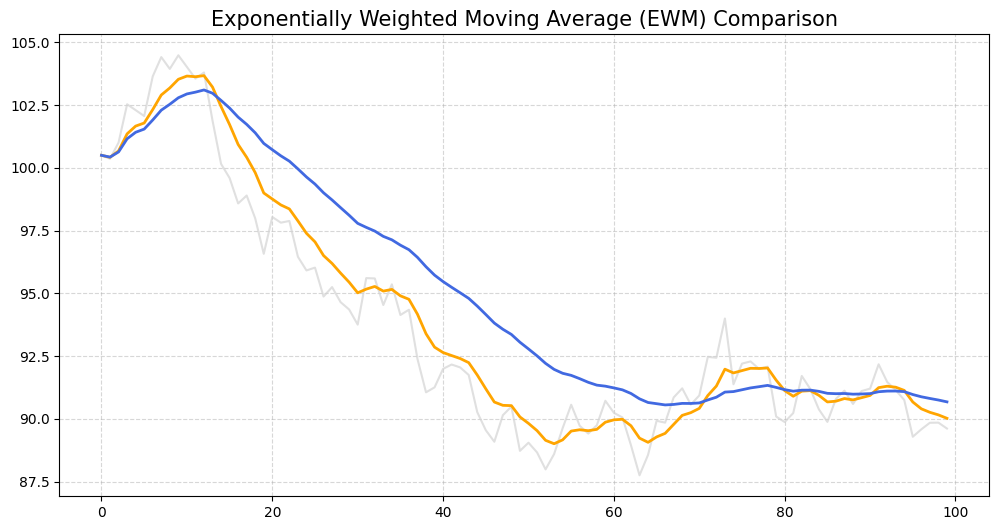

In [3]:
# 그래프 그리기 코드

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 가상의 시계열 데이터 생성 (변동성이 큰 추가 데이터 생성)
np.random.seed(42)
data = np.random.randn(100).cumsum() + 100
df = pd.DataFrame({'Price': data})

# 2. 지수가중평균 EWM계산
# span이 작을수록 최근 값에 민감하고, 클수록 부드러워집니다.
df['EWM_7'] = df['Price'].ewm(span=7).mean() # 일주일 치 가중치
df['EWM_30'] = df ['Price'].ewm(span=30).mean() # 한달 치 가중치


# 그래프 그리기
plt.figure(figsize=(12, 6))

# 원본 데이터 (연한 회색으로 흐리게)
plt.plot(df['Price'], label='Original Price', color='lightgray', alpha=0.7)


# EWM 7 (주황색 - 변화에 빠르게 반응)
plt.plot(df['EWM_7'], label='EWM_7', color='orange', linewidth=2)

# EWM 30 (파란색 - 아주 부드러운 추세선)
plt.plot(df['EWM_30'], label='EWM_30', color='royalblue', linewidth=2)

# 그래프 꾸미기
plt.title('Exponentially Weighted Moving Average (EWM) Comparison', fontsize=15)
plt.legend
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()
